In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [37]:
df=load_iris()


In [3]:
x=df.data

In [4]:
y=df.target


In [5]:
class_name=df.target_names
class_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
classifier=Sequential()


In [69]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2

classifier.add(Dense(units=4,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=3,activation='softmax'))

In [70]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_hist=classifier.fit(x_train,y_train,validation_split=0.33,epochs=30,batch_size=10)

Epoch 1/30


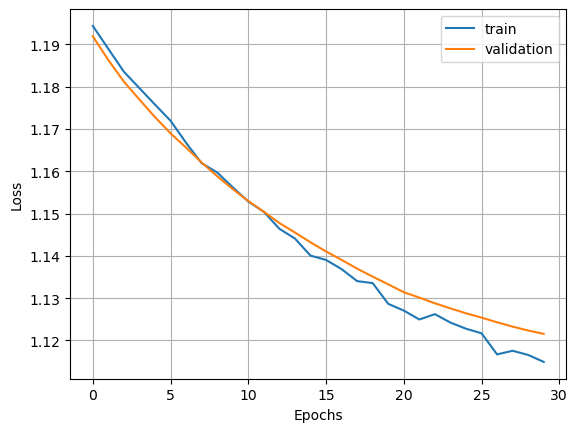

In [65]:
import matplotlib.pyplot as plt
plt.plot(model_hist.history['loss'],label='train')
plt.plot(model_hist.history['val_loss'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
def calcl_accuracy(y_true,y_pred):
  return accuracy_score(y_true,y_pred)

In [67]:
y_pred=classifier.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


In [68]:
calcl_accuracy(y_test,y_pred)

0.26666666666666666

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13  1  0]
 [ 0  5  3]
 [ 0  0  8]]
